In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import datetime as dt
import numpy as np

Desktop Edit

Laptop Edit

In [2]:
html = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = BeautifulSoup(html.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
stock_data = pd.read_html(str(table))[0]

In [4]:
delta_t = pd.tseries.offsets.BusinessDay(n = 21)
end_date = dt.date.today()
start_date = end_date - delta_t

In [5]:
names = [name.replace(".", "-") for name in stock_data.Symbol]

In [6]:
name_query = " ".join(names)

In [7]:
px = yf.download(name_query, period='1mo')

[*********************100%***********************]  503 of 503 completed


If we have to run a part of the script multiple times to check if correct, thats fine. Add it as a decorator

In [8]:
rets = px.pct_change(1)

Download chain, check if empty, Create DF with name and concat as rows

In [9]:
tickers = yf.Tickers(name_query)

opt_expiries = pd.DataFrame()
opt_chain = pd.DataFrame()

for name in names[:50]:
    
    tick = tickers.tickers[name]
    
    t_exp = pd.Series(tick.options, dtype=pd.StringDtype())
    
    if not t_exp.empty:
    
        for exp in t_exp:
            
            t_book = tick.option_chain(exp)
            t_calls = t_book.calls
            t_puts = t_book.puts
            
            t_calls['callput'] = 'call'
            t_puts['callput'] = 'put'
            
            t_chain = pd.concat([t_calls, t_puts])
            
            t_chain['expiry'] = exp
            t_chain['ticker'] = name
            t_chain['stock_px'] = px['Adj Close'][name].iloc[-1]
            t_chain['stock_ret'] = rets['Adj Close'][name].iloc[-1]
            
            t_chain.reset_index(drop=True, inplace=True)
            
            opt_chain = pd.concat([opt_chain, t_chain])
            
opt_chain.reset_index(drop=True, inplace=True)

/var/folders/k2/d2y9gjxs0jz7tm_dt0tv243m0000gn/T/ipykernel_44570/914806418.py:32: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  opt_chain = pd.concat([opt_chain, t_chain])
/var/folders/k2/d2y9gjxs0jz7tm_dt0tv243m0000gn/T/ipykernel_44570/914806418.py:23: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  t_chain = pd.concat([t_calls, t_puts])


In [ ]:
today_array = [dt.date.today().strftime('%Y-%m-%d') for x in opt_chain.index]

In [ ]:
opt_chain['k_norm'] = opt_chain['strike'] / opt_chain['stock_px']
opt_chain['1d_delta'] = opt_chain['change'] / 100 / opt_chain['stock_ret']
opt_chain['t_exp'] = np.busday_count(today_array, [x for x in opt_chain['expiry']])

In [ ]:
import numpy as np

gDaysInYear = 365.0  # .242
gSmall = 1e-12
gNotebookMode = False

INVROOT2PI = 0.3989422804014327

def n_vect(x):
    return N(x)

In [ ]:
def N(x):
    """ Fast Normal CDF function based on Hull OFAODS  4th Edition Page 252.
    This function is accurate to 6 decimal places. """

    a1 = 0.319381530
    a2 = -0.356563782
    a3 = 1.781477937
    a4 = -1.821255978
    a5 = 1.330274429
    g = 0.2316419

    k = 1.0 / (1.0 + g * np.abs(x))
    k2 = k * k
    k3 = k2 * k
    k4 = k3 * k
    k5 = k4 * k

    if x >= 0.0:
        c = (a1 * k + a2 * k2 + a3 * k3 + a4 * k4 + a5 * k5)
        phi = 1.0 - c * np.exp(-x*x/2.0) * INVROOT2PI
    else:
        phi = 1.0 - N(-x)

    return phi

In [ ]:
def bs_delta(s, t, k, r, q, v, p_c):
    """ Price a derivative using Black-Scholes model. """

    if p_c == 'call':
        phi = +1.0
    elif p_c == 'put':
        phi = -1.0

    k = np.maximum(k, gSmall)
    t = np.maximum(t, gSmall)
    v = np.maximum(v, gSmall)

    vsqrtT = v * np.sqrt(t)
    ss = s * np.exp(-q*t)
    kk = k * np.exp(-r*t)
    d1 = np.log(ss/kk) / vsqrtT + vsqrtT / 2.0
    delta = phi * np.exp(-q*t) * n_vect(phi * d1)
    return delta

In [ ]:
opt_chain

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,contractSize,currency,callput,expiry,ticker,stock_px,stock_ret,k_norm,1d_delta,t_exp
0,MMM230113C00105000,2023-01-06 20:27:49+00:00,105.0,21.82,21.50,22.00,6.290000,40.502254,2.0,2.0,...,REGULAR,USD,call,2023-01-13,MMM,126.720001,0.030579,0.828598,2.056963,4
1,MMM230113C00110000,2023-01-06 20:49:58+00:00,110.0,16.96,16.40,17.10,6.599999,63.706560,2.0,1.0,...,REGULAR,USD,call,2023-01-13,MMM,126.720001,0.030579,0.868056,2.158339,4
2,MMM230113C00113000,2022-12-30 20:02:11+00:00,113.0,6.70,13.55,14.05,0.000000,0.000000,2.0,2.0,...,REGULAR,USD,call,2023-01-13,MMM,126.720001,0.030579,0.891730,0.000000,4
3,MMM230113C00116000,2022-12-30 20:03:20+00:00,116.0,4.40,10.60,11.15,0.000000,0.000000,2.0,2.0,...,REGULAR,USD,call,2023-01-13,MMM,126.720001,0.030579,0.915404,0.000000,4
4,MMM230113C00117000,2022-12-30 16:01:41+00:00,117.0,4.35,9.55,10.20,0.000000,0.000000,64.0,64.0,...,REGULAR,USD,call,2023-01-13,MMM,126.720001,0.030579,0.923295,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28344,AJG230721P00170000,2022-12-30 19:53:18+00:00,170.0,5.16,3.60,5.90,0.000000,0.000000,2.0,3.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,0.885324,0.000000,139
28345,AJG230721P00180000,2022-12-15 19:29:02+00:00,180.0,8.70,5.80,7.90,0.000000,0.000000,NaN,3.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,0.937402,0.000000,139
28346,AJG230721P00185000,2023-01-05 16:01:30+00:00,185.0,10.70,7.10,10.10,0.000000,0.000000,1.0,5.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,0.963441,0.000000,139
28347,AJG230721P00195000,2023-01-05 20:46:00+00:00,195.0,15.60,11.20,14.10,0.000000,0.000000,2.0,5.0,...,REGULAR,USD,put,2023-07-21,AJG,192.020004,0.029929,1.015519,0.000000,139


In [ ]:
opt_chain.columns

Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency',
       'callput', 'expiry', 'ticker', 'stock_px', 'stock_ret', 'k_norm',
       '1d_delta', 't_exp'],
      dtype='object')

In [ ]:
opt_chain['delta_calc'] = opt_chain.apply(lambda x: bs_delta(x.stock_px, x.t_exp/252, x.strike, 0, 0, x.impliedVolatility, x.callput), axis = 1)

In [ ]:
opt_chain

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,currency,callput,expiry,ticker,stock_px,stock_ret,k_norm,1d_delta,t_exp,delta_calc
0,MMM230113C00105000,2023-01-06 20:27:49+00:00,105.0,21.82,21.50,22.00,6.290000,40.502254,2.0,2.0,...,USD,call,2023-01-13,MMM,126.720001,0.030579,0.828598,2.056963,4,0.995575
1,MMM230113C00110000,2023-01-06 20:49:58+00:00,110.0,16.96,16.40,17.10,6.599999,63.706560,2.0,1.0,...,USD,call,2023-01-13,MMM,126.720001,0.030579,0.868056,2.158339,4,0.949105
2,MMM230113C00113000,2022-12-30 20:02:11+00:00,113.0,6.70,13.55,14.05,0.000000,0.000000,2.0,2.0,...,USD,call,2023-01-13,MMM,126.720001,0.030579,0.891730,0.000000,4,0.945982
3,MMM230113C00116000,2022-12-30 20:03:20+00:00,116.0,4.40,10.60,11.15,0.000000,0.000000,2.0,2.0,...,USD,call,2023-01-13,MMM,126.720001,0.030579,0.915404,0.000000,4,0.920679
4,MMM230113C00117000,2022-12-30 16:01:41+00:00,117.0,4.35,9.55,10.20,0.000000,0.000000,64.0,64.0,...,USD,call,2023-01-13,MMM,126.720001,0.030579,0.923295,0.000000,4,0.908125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28344,AJG230721P00170000,2022-12-30 19:53:18+00:00,170.0,5.16,3.60,5.90,0.000000,0.000000,2.0,3.0,...,USD,put,2023-07-21,AJG,192.020004,0.029929,0.885324,0.000000,139,-0.240123
28345,AJG230721P00180000,2022-12-15 19:29:02+00:00,180.0,8.70,5.80,7.90,0.000000,0.000000,NaN,3.0,...,USD,put,2023-07-21,AJG,192.020004,0.029929,0.937402,0.000000,139,-0.325812
28346,AJG230721P00185000,2023-01-05 16:01:30+00:00,185.0,10.70,7.10,10.10,0.000000,0.000000,1.0,5.0,...,USD,put,2023-07-21,AJG,192.020004,0.029929,0.963441,0.000000,139,-0.383214
28347,AJG230721P00195000,2023-01-05 20:46:00+00:00,195.0,15.60,11.20,14.10,0.000000,0.000000,2.0,5.0,...,USD,put,2023-07-21,AJG,192.020004,0.029929,1.015519,0.000000,139,-0.504290


<AxesSubplot: xlabel='k_norm'>

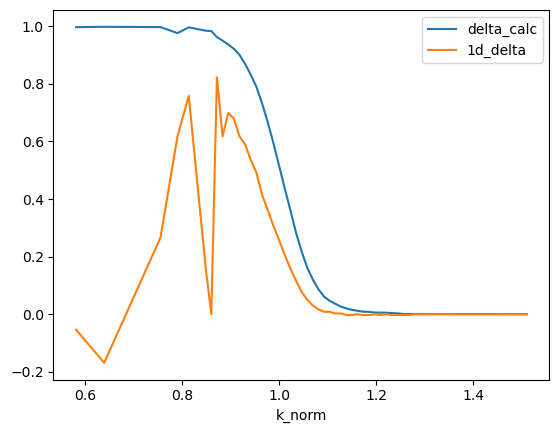

In [ ]:
opt_chain[(opt_chain['ticker'] == 'AMZN') & (opt_chain['expiry'] == '2023-01-13') & (opt_chain['callput'] == 'call')][['delta_calc', '1d_delta', 'k_norm']].set_index('k_norm').plot()

<AxesSubplot: xlabel='k_norm'>

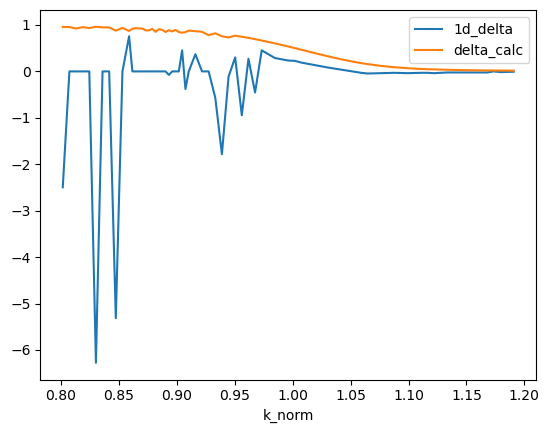

In [272]:
opt_chain[(opt_chain['ticker'] == 'GOOGL') & (opt_chain['expiry'] == '2023-01-20') 
          & (opt_chain['callput'] == 'call') & (opt_chain['k_norm'] > 0.8) & (opt_chain['k_norm'] < 1.2)].set_index('k_norm')[['1d_delta', 'delta_calc']].plot()

In [273]:
ticks = ['AMZN', 'AAPL', 'AMD', 'GOOGL']

In [294]:
d_curve = opt_chain[(opt_chain['ticker'].isin(ticks)) & (opt_chain['expiry'] == '2023-02-17') & (opt_chain['callput'] == 'call')]

Have index of np range 0.75 to 1.25 in 0.01 gaps. we dont need to actually mark to market for an option

In [299]:
curves = pd.DataFrame()
for tick in ticks:
    
    t_curve = d_curve[d_curve['ticker'] == tick][['k_norm', 'delta_calc']].set_index('k_norm')
    curves = pd.concat([curves, t_curve], axis = 1)
    
curves = curves[(curves.index > 0.7) & (curves.index < 1.3)].copy()

In [ ]:
curves.plot()

,delta_calc,delta_calc,delta_calc,delta_calc
k_norm,,,,
0.755112,0.912086,NaN,NaN,NaN
0.813197,0.862040,NaN,NaN,NaN
0.871283,0.787153,NaN,NaN,NaN
0.929368,0.686561,NaN,NaN,NaN
0.987454,0.563507,NaN,NaN,NaN
1.045539,0.429598,NaN,NaN,NaN
1.103625,0.305533,NaN,NaN,NaN
1.161710,0.202970,NaN,NaN,NaN
1.219796,0.130013,NaN,NaN,NaN
